In [72]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [73]:
data = pd.read_csv("datas/USvideos.csv")

In [74]:
df = pd.DataFrame(data)

In [75]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [76]:
df.shape

(40949, 16)

In [77]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [79]:
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [80]:
df.duplicated().sum()

np.int64(48)

In [81]:
df = df.drop_duplicates()

In [82]:
df.duplicated().sum()

np.int64(0)

In [83]:
# convert type 
def convert_type(column_name, dtype):
    df[column_name]  = df[column_name].astype(dtype)

In [84]:
convert_type("views",int)
convert_type("likes",int)
convert_type("dislikes",int)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  thumbnail_link          40901 non-null  object
 12  comments_disabled       40901 non-null  bool  
 13  ratings_disabled        40901 non-null  bool  
 14  video_error_or_removed  40901 non-null  bool  
 15  descrip

In [86]:
df["trending_date"] = pd.to_datetime(df["trending_date"], format="%y.%d.%m")
df["publish_time"] = pd.to_datetime(df["publish_time"])

In [87]:
numerical_data_columns = ["views","likes","dislikes","comment_count"]
non_numerical= ["title","category_id","publish_time","channel_title"]

In [144]:
corr = df[numerical_data_columns].corr()
corr

,views,likes,dislikes,comment_count
views,1.000000,0.849179,0.472216,0.617657
likes,0.849179,1.000000,0.447188,0.803088
dislikes,0.472216,0.447188,1.000000,0.700192
comment_count,0.617657,0.803088,0.700192,1.000000


In [89]:
df["like_rates"] = df["likes"]/df["views"]
df["dislike_rates"] = df["dislikes"]/df["views"]
df["comment_rate"] = df["comment_count"]/df["views"]

In [90]:

df.groupby("publish_time")["views"].max()[:1]

publish_time
2006-07-23 08:24:11+00:00    258506
Name: views, dtype: int64

In [91]:
# What upload day of week gets the most views?
df["day"] = df["publish_time"].dt.day_name()
df["hour"] = df["publish_time"].dt.hour

In [92]:
grouped_day = df.groupby("day")
print(f"day with most views: {grouped_day["views"].max()[:1]}")
print()
print(f"day with most likes: {grouped_day["likes"].max()[:1]}")
print()
grouped_hour = df.groupby("hour")
print(f"hour with most views: {grouped_hour["views"].max()[:1]}")
print()
print(f"hour with most likes: {grouped_hour["likes"].max()[:1]}")
print()

day with most views: day
Friday    148689896
Name: views, dtype: int64

day with most likes: day
Friday    5613827
Name: likes, dtype: int64

hour with most views: hour
0    36101955
Name: views, dtype: int64

hour with most likes: hour
0    998395
Name: likes, dtype: int64



In [93]:
# Visualizing the data

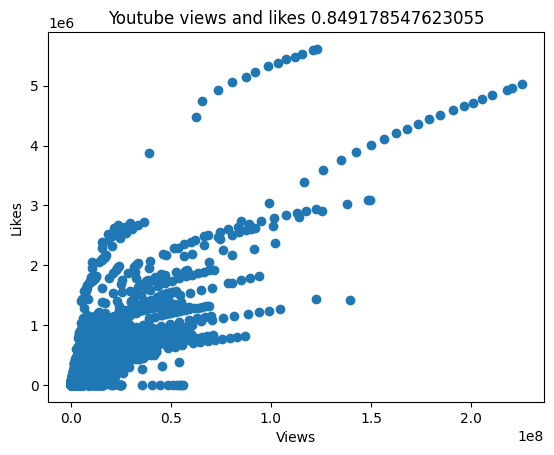

In [94]:
views = list(df["views"])
likes = list(df["likes"])

plt.scatter(x=views, y=likes)
plt.title(f"Youtube views and likes {df[numerical_data_columns].corr().loc["views"]["likes"]}")
plt.ylabel("Likes")
plt.xlabel("Views")
plt.savefig("charts/views_vs_likes.png")
plt.show()

In [ ]:
# Bar chart
label = df.nlargest(5,"views")["title"]
x = df["views"].sort_values(ascending=False).head(3)

Text(0, 0.5, 'Views')

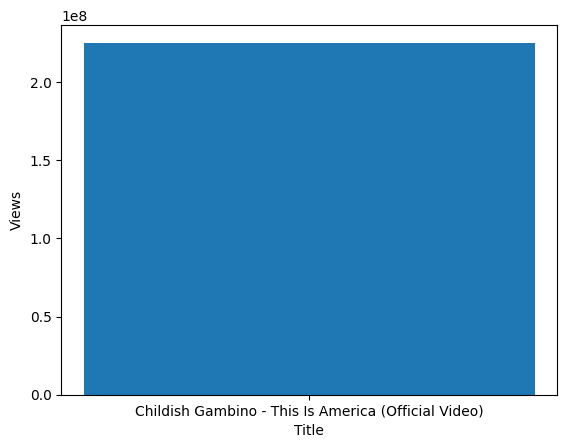

In [121]:
plt.bar(label,x)
# plt.figure()
plt.xlabel("Title")
plt.ylabel("Views")

In [ ]:
x

[225211923, 220490543, 217750076, 210338856, 205643016]

In [123]:
label

['Childish Gambino - This Is America (Official Video)',
 'Childish Gambino - This Is America (Official Video)',
 'Childish Gambino - This Is America (Official Video)',
 'Childish Gambino - This Is America (Official Video)',
 'Childish Gambino - This Is America (Official Video)']

In [162]:
new_label = (df.groupby("title",as_index=False)["views"].max().sort_values("views",ascending=False).head(10))

In [164]:
labels = new_label["title"]
view_count = new_label["views"]

C:\Users\dipak\AppData\Local\Temp\ipykernel_17020\1980779969.py:6: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dipak\AppData\Local\Temp\ipykernel_17020\1980779969.py:6: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dipak\AppData\Local\Temp\ipykernel_17020\1980779969.py:6: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dipak\AppData\Local\Temp\ipykernel_17020\1980779969.py:6: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dipak\AppData\Local\Temp\ipykernel_17020\1980779969.py:6: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dipak\AppData\Local\Temp\ipykernel_17020\1980779969.py:9: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from f

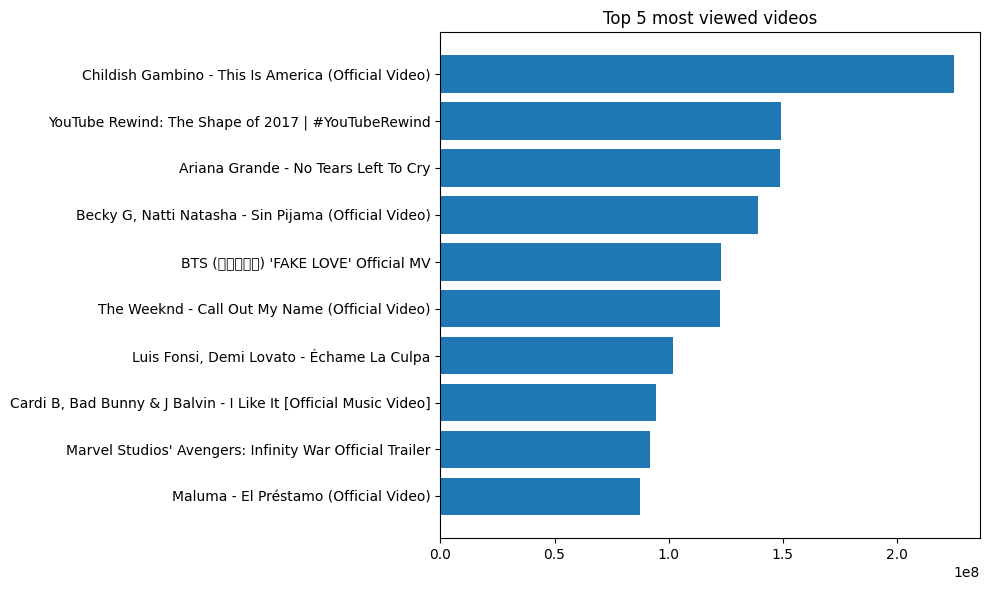

In [165]:

plt.figure(figsize=(10,6))
plt.barh(labels,view_count)
# plt.xlabel("Title")
# plt.ylabel("Views")
plt.title("Top 5 most viewed videos")
plt.tight_layout()
plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
plt.savefig("charts/barh.png")
plt.show()